In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
from tvb.simulator.lab import *
import h5py
import os
import matplotlib.pyplot as plt

import scipy 
import scipy.fftpack
import seaborn as sns

import scipy 
import scipy.fftpack
from scipy.fft import fft, ifft
from scipy import signal
from scipy.integrate import simps
from fooof import FOOOF
from scipy import stats

In [3]:
os.chdir("C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Wilson Cowan/DATA")

In [4]:
#import connectivity file to know which region corresponds to which index in the matrices
filename = "Connectivity.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    regions_list = list(f['region_labels'])

regions = np.array(regions_list)

Keys: <KeysViewHDF5 ['areas', 'centres', 'cortical', 'hemispheres', 'orientations', 'region_labels', 'tract_lengths', 'weights']>


In [5]:
os.chdir("C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Datasets/All_freqs")
#import timeseries
mydir = "C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Datasets/All_freqs"

filename = mydir + "/Depr_leftDLPFC.h5"
with h5py.File(filename, "r") as f:
    depr_left = f["data"]
    depr_left= np.array(depr_left)
    
filename = mydir + "/Depr_rightDLPFC.h5"
with h5py.File(filename, "r") as f:
    depr_right = f["data"]
    depr_right = np.array(depr_right)

    
file_name = mydir + "/TimeSeries_Depr.h5"
with h5py.File(filename, "r") as f:
    depr_TS = f["data"]
    depr_TS= np.array(depr_TS)
    
filename = mydir + "/Time_Depr.h5"
with h5py.File(filename, "r") as f:
    deprtime = f["time"]
    deprtime = np.array(deprtime)

In [6]:
filename = mydir + "/HF_leftDLPFC.h5"
with h5py.File(filename, "r") as f:
    HF_left = f["data"]
    HF_left= np.array(HF_left)
    
filename = mydir + "/HF_rightDLPFC.h5"
with h5py.File(filename, "r") as f:
    HF_right = f["data"]
    HF_right = np.array(HF_right)

    
file_name = mydir + "/TimeSeries_HF.h5"
with h5py.File(filename, "r") as f:
    HF_TS = f["data"]
    HF_TS= np.array(HF_TS)
    
filename = mydir + "/Time_Depr.h5"
with h5py.File(filename, "r") as f:
    HFtime = f["time"]
    HFtime = np.array(HFtime)

In [7]:
filename = mydir + "/LF_leftDLPFC.h5"
with h5py.File(filename, "r") as f:
    LF_left = f["data"]
    LF_left= np.array(LF_left)
    
filename = mydir + "/LF_rightDLPFC.h5"
with h5py.File(filename, "r") as f:
    LF_right = f["data"]
    LF_right = np.array(LF_right)

    
file_name = mydir + "/TimeSeries_LF.h5"
with h5py.File(filename, "r") as f:
    LF_TS = f["data"]
    LF_TS= np.array(LF_TS)
    
filename = mydir + "/Time_LF.h5"
with h5py.File(filename, "r") as f:
    LFtime = f["time"]
    LFtime = np.array(LFtime)

In [8]:
#import timeseries healthy
mydir = "C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Datasets/All_freqs"

filename = mydir + "/Health_leftDLPFC.h5"
with h5py.File(filename, "r") as f:
    health_left = f["data"]
    health_left= np.array(health_left)
    
filename = mydir + "/Health_rightDLPFC.h5"
with h5py.File(filename, "r") as f:
    health_right = f["data"]
    health_right = np.array(health_right)

    
file_name = mydir + "/TimeSeries_Health.h5"
with h5py.File(filename, "r") as f:
    health_TS = f["data"]
    health_TS= np.array(health_TS)
    
filename = mydir + "/Time_Health.h5"
with h5py.File(filename, "r") as f:
    healthtime = f["time"]
    healthtime = np.array(healthtime)

In [11]:
print(shape(depr_TS))
print(shape(health_TS))
print(shape(LF_TS))
print(shape(HF_TS))

(2060, 100)
(2060, 100)
(2060, 100)
(2060, 100)


In [17]:
#average all time series 
av_LF = LF_TS.mean(axis = 1)
av_depr = depr_TS.mean(axis = 1) 
av_HF = HF_TS.mean(axis = 1)
av_health = health_TS.mean(axis = 1)

av_left_depr = depr_left.mean(axis = 1)
av_right_depr = depr_right.mean(axis = 1)

av_left_health = health_left.mean(axis = 1)
av_right_health= health_right.mean(axis = 1)

av_left_HF = HF_left.mean(axis = 1)
av_right_HF= HF_right.mean(axis = 1)

av_left_LF = LF_left.mean(axis = 1)
av_right_LF= LF_right.mean(axis = 1)

print(len(av_health))
print(len(healthtime))
print((len(av_LF)))
print(len(av_HF))
print(len(av_depr))

2060
2060
2060
2060
2060


<IPython.core.display.Javascript object>


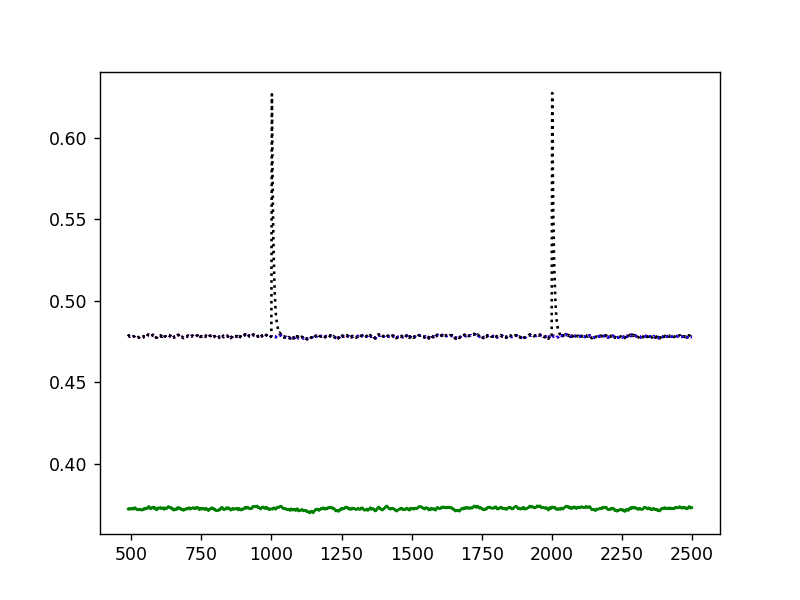

<IPython.core.display.Javascript object>


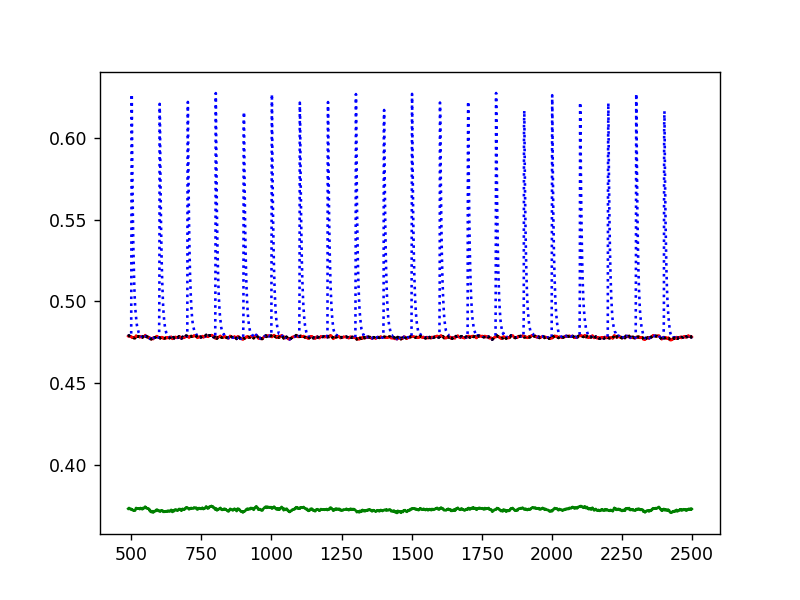

<IPython.core.display.Javascript object>


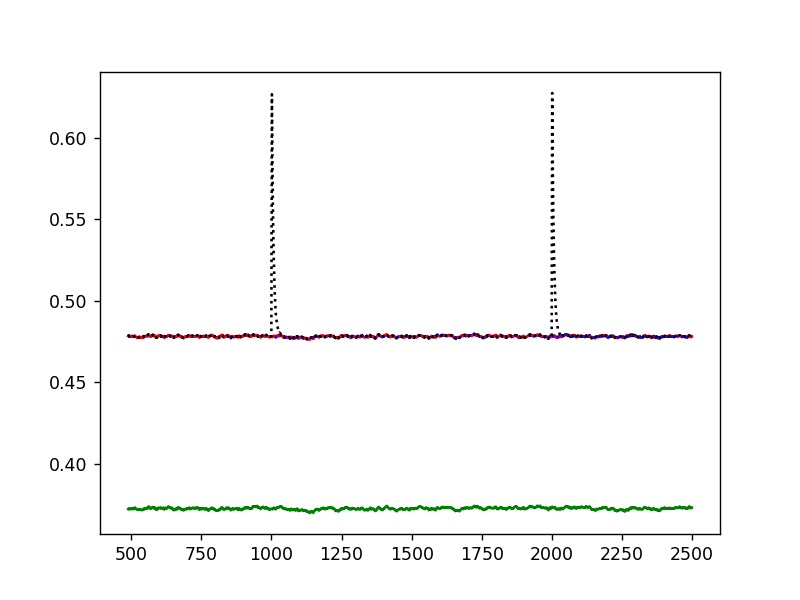

In [18]:
#plot average time series across 100 participants
figure(1)
plt.plot(healthtime, av_health, color = "green")
plt.plot(healthtime, av_depr, color = "red", linestyle = "dotted")
plt.plot(healthtime, av_HF, color = "blue", linestyle = "dotted")
plt.plot(healthtime, av_LF, color = "black", linestyle = "dotted")
plt.show()

figure(2)
plt.plot(healthtime, av_left_health, color  = "green")
plt.plot(healthtime, av_left_depr, color = "red")
plt.plot(healthtime, av_left_HF, color = "blue", linestyle = "dotted")
plt.plot(healthtime, av_left_LF, color = "black", linestyle = "dotted")
plt.show()

figure(3)
plt.plot(healthtime, av_right_health, color = "green")
plt.plot(healthtime, av_right_depr, color = "red")
plt.plot(healthtime, av_right_HF, color = "blue", linestyle = "dotted")
plt.plot(healthtime, av_right_LF, color = "black", linestyle = "dotted")
plt.show()

C:\Users\celie\OneDrive\Documenten\TVB_Windows_2.2\TVB_Distribution\tvb_data\Lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 2060, using nperseg = 2060
  .format(nperseg, input_length))
C:\Users\celie\OneDrive\Documenten\TVB_Windows_2.2\TVB_Distribution\tvb_data\Lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 2060, using nperseg = 2060
  .format(nperseg, input_length))
C:\Users\celie\OneDrive\Documenten\TVB_Windows_2.2\TVB_Distribution\tvb_data\Lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 2060, using nperseg = 2060
  .format(nperseg, input_length))


<IPython.core.display.Javascript object>


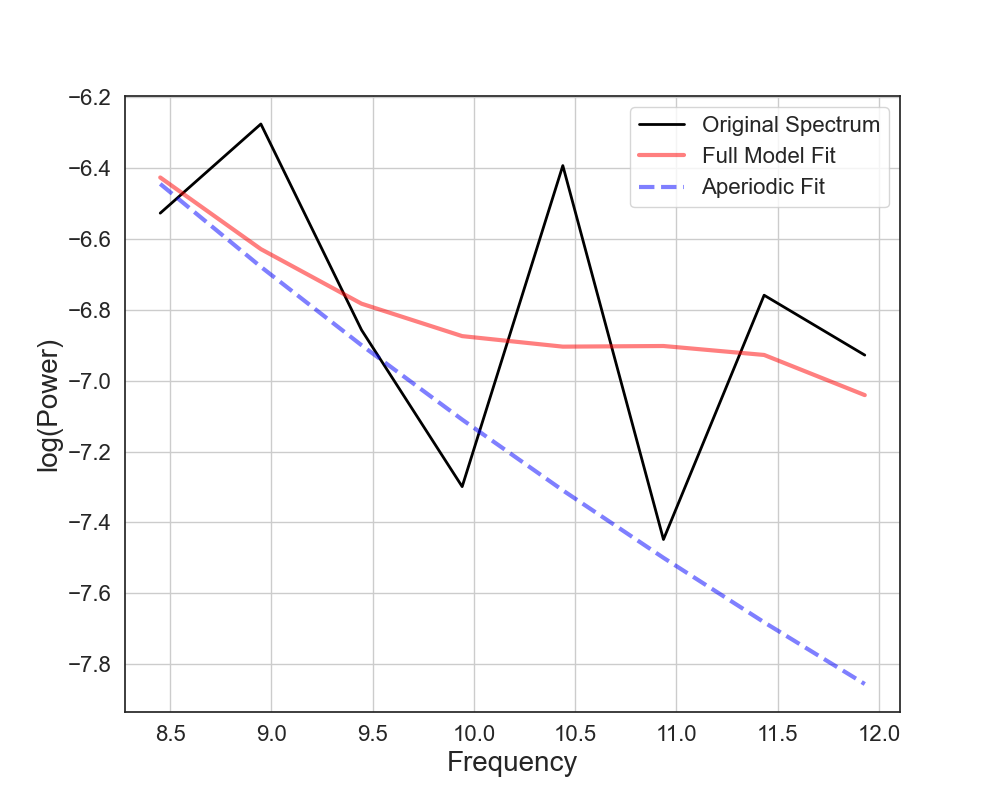

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 8 - 12 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          2.2899, 9.4235                                          
                                                                                                  
                                       1 peaks were found:                                        
          

<IPython.core.display.Javascript object>


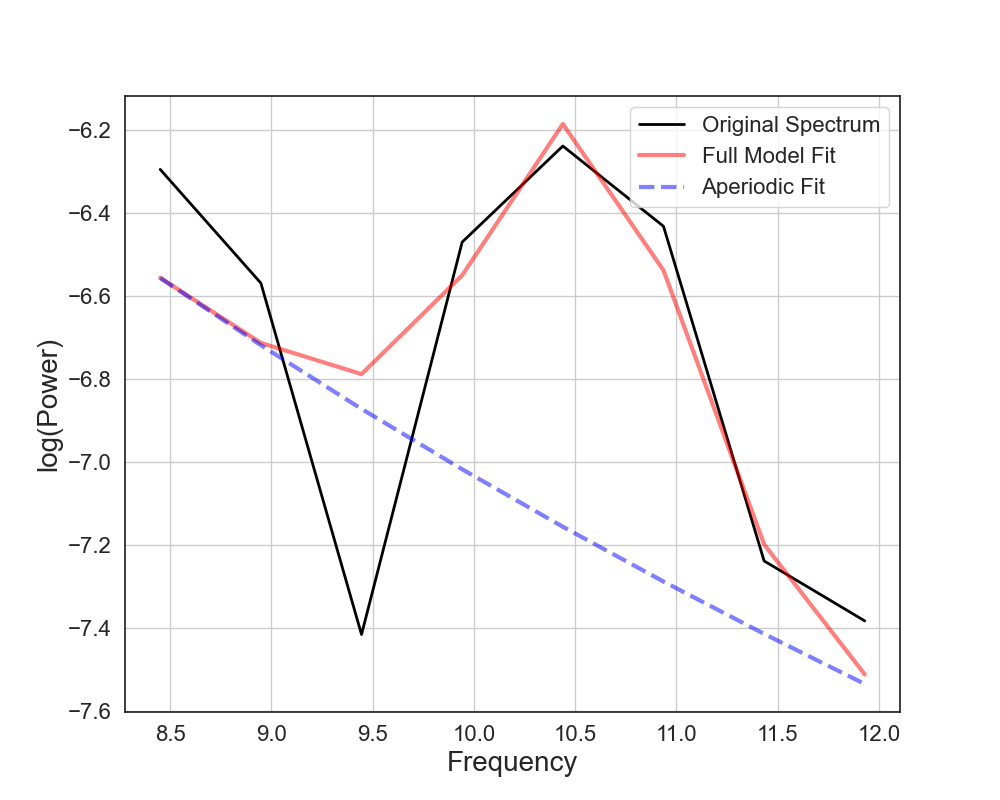

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 8 - 12 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.5014, 6.5321                                          
                                                                                                  
                                       1 peaks were found:                                        
          

<IPython.core.display.Javascript object>


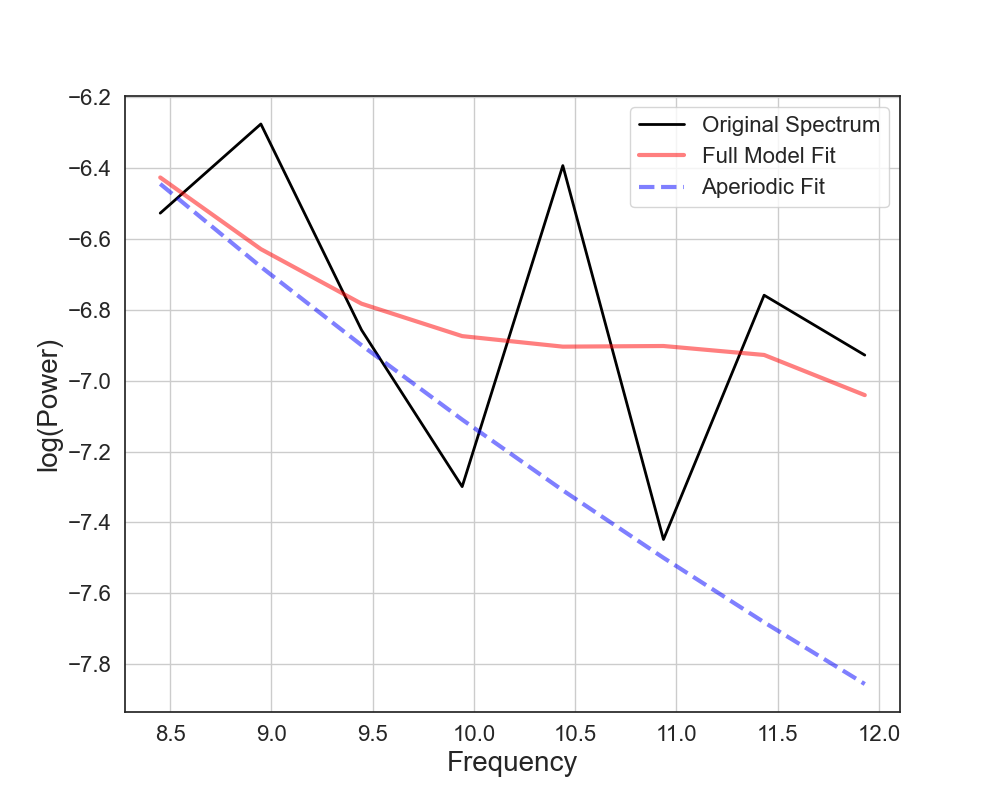

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 8 - 12 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          2.2899, 9.4235                                          
                                                                                                  
                                       1 peaks were found:                                        
          

In [45]:
#visualisation of power spectrum in alpha band (on average across 100simulations)

sf = 1024
win = 4 * sf
freqs_health, psd_health = signal.welch(av_health, sf, nperseg=win)
freqs_health_left, psd_health_left = signal.welch(av_left_health, sf, nperseg=win)
freqs_health_right, psd_health_right = signal.welch(av_right_health, sf, nperseg=win)

freq_range = [8,12] 

#healthy 
fm = FOOOF(peak_width_limits=[1, 8], max_n_peaks=6, min_peak_height=0.2)
fm.report(freqs_health, psd_health, freq_range)
peaks_h = fm.get_params('peak_params')

#left dlpfc
fm = FOOOF(peak_width_limits=[1, 8], max_n_peaks=6, min_peak_height=0.2)
fm.report(freqs_health_left, psd_health_left, freq_range)
peaks_h = fm.get_params('peak_params')

#right dlpfc
fm = FOOOF(peak_width_limits=[1, 8], max_n_peaks=6, min_peak_height=0.2)
fm.report(freqs_health_right, psd_health_right, freq_range)
peaks_h = fm.get_params('peak_params')

#doel hier:
maak array met aantal kolommen = aantal frequency bands geinspecteerd (low, lowest, middle, high, overall), allemaal alfa
aantal rijen = aantal subjects

zo'n array voor average time serie (across all regions), left DLFPC, en right DLPFC

dan simpelweg t.test voor mean(health, depr, hf, lf) + effect sizes


In [33]:
#import timeseries healthy: alpha power
mydir = "C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Datasets/All_freqs"
    
filename = mydir + "/Time_Health.h5"
with h5py.File(filename, "r") as f:
    healthtime = f["time"]
    healthtime = np.array(healthtime)
    
filename = mydir + "/power_alpha_overall.h5"
with h5py.File(filename, "r") as f:
    alpha_all = f["data"]
    alpha_all = np.array(alpha_all)

filename = mydir + "/power_alpha_lDLPFC.h5"
with h5py.File(filename, "r") as f:
    alpha_left = f["data"]
    alpha_left = np.array(alpha_left)
    
filename = mydir + "/power_alpha_rDLPFC.h5"
with h5py.File(filename, "r") as f:
    alpha_right = f["data"]
    alpha_right = np.array(alpha_right)
    
filename = mydir + "/power_alpha_overall_depr.h5"
with h5py.File(filename, "r") as f:
    alpha_all_dep = f["data"]
    dep = np.array(alpha_all_dep)
    

filename = mydir + "/power_alpha_lDLPFC_depr.h5"
with h5py.File(filename, "r") as f:
    alpha_left_depr = f["data"]
    alpha_left_depr = np.array(alpha_left_depr)
    
filename = mydir + "/power_alpha_rDLPFC_depr.h5"
with h5py.File(filename, "r") as f:
    alpha_right_depr = f["data"]
    alpha_right_depr = np.array(alpha_right_depr)

In [34]:
#example: calculate p-value between left and right alpha (asymmetry indication), deze
left_right_health = stats.ttest_ind(alpha_left, alpha_right).pvalue
print(left_right_health)

left_right_depr = stats.ttest_ind(alpha_left_depr, alpha_right_depr).pvalue
print(left_right_depr)


[0.02222251 0.07166327 0.16509087 0.86085871 0.12944721]
[0.11787762 0.6393316  0.48731318 0.13365787 0.57273898]


In [29]:
hd = stats.ttest_ind(dep, alpha_all).pvalue
hd

array([0.31188399, 0.75220837, 0.59294084, 0.31809649, 0.78405199])

In [17]:
#calculate mean values (across all 100 participants, for each frequency subband and the whole band)
left_mean = alpha_left.mean(axis = 0)

In [18]:
left_mean

array([1.30695323e-07, 1.30779373e-07, 1.07901560e-07, 4.80854381e-08,
       3.56285045e-08])

In [39]:
left_mean_depr = alpha_left_depr.mean(axis = 0)
print(left_mean_depr)

[6.87983047e-08 7.83014901e-08 8.03750896e-08 7.04892015e-08
 6.29479222e-08]


In [8]:
alpha_all

array([[8.81101998e-09, 4.92501532e-10, 8.06132517e-10, 3.61543834e-09,
        8.68855379e-09],
       [8.81101998e-09, 4.92501532e-10, 8.06132517e-10, 3.61543834e-09,
        8.68855379e-09],
       [8.81101998e-09, 4.92501532e-10, 8.06132517e-10, 3.61543834e-09,
        8.68855379e-09],
       [8.42003317e-10, 7.18399182e-10, 1.91118639e-09, 1.08688654e-09,
        2.29737676e-09],
       [8.42003317e-10, 7.18399182e-10, 1.91118639e-09, 1.08688654e-09,
        2.29737676e-09],
       [8.42003317e-10, 7.18399182e-10, 1.91118639e-09, 1.08688654e-09,
        2.29737676e-09],
       [8.42003317e-10, 7.18399182e-10, 1.91118639e-09, 1.08688654e-09,
        2.29737676e-09],
       [2.15858649e-09, 2.35160698e-11, 2.27014120e-09, 3.07752692e-09,
        1.83474777e-09],
       [2.15858649e-09, 2.35160698e-11, 2.27014120e-09, 3.07752692e-09,
        1.83474777e-09],
       [2.15858649e-09, 2.35160698e-11, 2.27014120e-09, 3.07752692e-09,
        1.83474777e-09],
       [2.15858649e-09, 2.3516